# EE2405 Embedded System Lab Exam #2 Part 2

**Please click on "Open in playground" at the upper-left corner to create a copy for you.**

---

**Please fill in correct statements in the right of the codes to finish the scripts.**  
Data sample is generated with a quadratic function and we will train a regression model to fit the data.  
And we convert and interpret the trained model with a Tensorflow lite APIs.

You can run the script again after you fill all the blank to check the outputs.

---

The Method to Download the Jupyter Notebook:  
File > Download .ipynb

## Import dependencies

In [0]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# Numpy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

## Generate Data

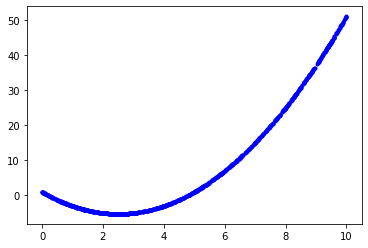

In [0]:
# We'll generate this many sample datapoints
############################################################
#@markdown Please fill in the number of samples (the sample should be large enough, but not too large for computation).
SAMPLES =  1000#@param {type:"number"}
############################################################


############################################################
#@markdown Please fill in your student id, which is the random seed.
student_id = 107061113 #@param {type:"number"}
np.random.seed(student_id)
############################################################

# Generate a uniformly distributed set of random numbers
# in the range from 0 to 10
x_values = np.random.uniform(low=0, high=10, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

############################################################
#@markdown Please fill in the statement to generate `y_values` with a quadratic function `y = x^2-5x+1`?
script = "y_values = x_values * x_values - 5 * x_values + 1" #@param {type:"string"}
exec(script)
############################################################

# Plot our data.
# The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

## Add some noise


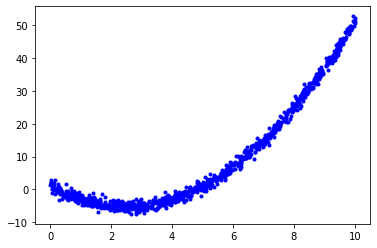

In [0]:
# Add a small random number to each y value
y_values += np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

## Split our data

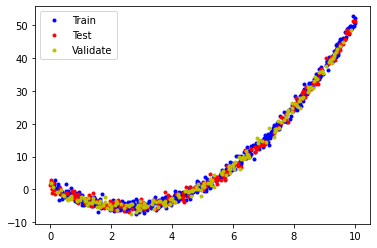

In [0]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

## Design a model


In [0]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Train the model

In [0]:
# Train the model on our training data while validating on our validation set
model.fit(x_train, y_train, epochs=1000, batch_size=16,
          validation_data=(x_validate, y_validate))

print("Done!")

Epoch 1/1000
38/38 [==============================] - 0s 6ms/step - loss: 375.9832 - mae: 12.5168 - val_loss: 261.7357 - val_mae: 10.9470
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 329.2887 - mae: 11.8369 - val_loss: 224.1012 - val_mae: 10.3591
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 282.0495 - mae: 11.3351 - val_loss: 190.9982 - val_mae: 9.9176
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 242.3338 - mae: 10.8382 - val_loss: 156.5605 - val_mae: 9.4599
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 196.6399 - mae: 10.4489 - val_loss: 130.9542 - val_mae: 9.2162
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 165.1730 - mae: 10.1741 - val_loss: 114.6071 - val_mae: 9.2618
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 142.5137 - mae: 10.0526 - val_loss: 109.4839 - val_mae: 9.3476
Epoch 8/1000
38/38 [===================

## Convert the Tensorflow Model to Tensorflow Lite Model

In [0]:
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

2532

## Predict

### Predict with Tensorflow Model

In [0]:
# Use the model to make predictions from our test data

############################################################
#@markdown How to use the model to predict the result with the test data (`x_test`) and save the result in a variable `predictions`?
script = "predictions = model.predict(x_test )" #@param {type:"string"}
exec(script)
############################################################

### Predict with Tensorflow Lite Model

In [0]:
# Use the Tensorflow lite model to make interfences from our test data
#@markdown Please choose and fill in correct code statements from one of the following:
#@markdown 1. interpreter.invoke() 
#@markdown 2. interpreter_input().fill(x_test[i])
#@markdown 3. interpreter = tf.lite.Interpreter('model.tflite')
#@markdown 4. interpreter_predictions[i] = interpreter_output()[0]
#@markdown 5. interpreter_output = interpreter.tensor(interpreter.get_output_details()[0]["index"])
#@markdown 6. interpreter_input = interpreter.tensor(interpreter.get_input_details()[0]["index"])

############################################################
# Instantiate an interpreter for the TFLite model
#@markdown Which is the statement to instantiate an interpreter with a TFLite Model named `model.tflite`?
script_1 = "interpreter = tf.lite.Interpreter('model.tflite')" #@param {type:"string"}
exec(script_1)
############################################################

# Allocate memory for the model
interpreter.allocate_tensors()

############################################################
# Get the input tensors so we can feed in values 
#@markdown Which is the statement to get input sensors?
script_2 = "interpreter_input = interpreter.tensor(interpreter.get_input_details()[0][\"index\"])" #@param {type:"string"}
exec(script_2)
############################################################

############################################################
# Get the output tensors so we can get the results
#@markdown Which is the statement to get output sensors?
script_3 = "interpreter_output = interpreter.tensor(interpreter.get_output_details()[0][\"index\"])" #@param {type:"string"}
exec(script_3)
############################################################

# Create arrays to store the results
interpreter_predictions = np.empty(x_test.size)

# Run each model's interpreter for each value and store the results in arrays
for i in range(x_test.size):
  ############################################################
  #@markdown Which is the statement to fill the input of the interpreter with `x_test[i]`?
  script_4 = "interpreter_input().fill(x_test[i])" #@param {type:"string"}
  exec(script_4)
  ############################################################
  ############################################################
  #@markdown Which is the statement to invoke the interpreter?
  script_5 = "interpreter.invoke() " #@param {type:"string"}
  exec(script_5)
  ############################################################
  ############################################################
  #@markdown Which is the statement to get the output from the interpreter and save the output in `interpreter_predictions[i]`?
  script_6 = "interpreter_predictions[i] = interpreter_output()[0]"#@param {type:"string"}
  exec(script_6)
  ############################################################


# Make the shape of the y_test be the same as the predictions
y_test = np.reshape(y_test, predictions.shape)
# Make the shape of the interpreter_predictions be the same as the predictions
interpreter_predictions = np.reshape(interpreter_predictions, predictions.shape)

## Plot the Result

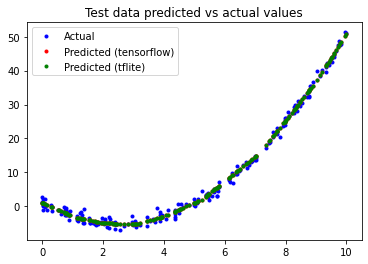

In [0]:
plt.clf()
plt.title('Test data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted (tensorflow)')
############################################################
#@markdown Please write the statement to plot the outputs in green dots with a label `Predicted (tflite)` from the interpreter.
script = "plt.plot(x_test, interpreter_predictions, 'g.', label='Predicted (tflite)')"#@param {type:"string"}
exec(script)
############################################################
plt.legend()
plt.show()